# Food Delivery application case study



### Context

The culinary landscape of New York is ever-expanding, with a burgeoning number of restaurants catering to the needs of a bustling population. Among them, students and busy professionals, pressed for time by their hectic schedules, find solace in the diverse offerings of these eateries. Recognizing the demand for convenience, online food delivery services emerge as a beacon, offering a seamless solution. In this realm, FoodHub shines as a premier food aggregator company, granting users access to a multitude of restaurants through a single, user-friendly smartphone application.

The food app streamlines the process of online ordering by enabling direct communication between customers and restaurants. Once an order is confirmed by the restaurant, the app seamlessly assigns a delivery person from the company to facilitate the pickup. Utilizing integrated mapping features, the delivery person navigates to the restaurant and awaits the packaged order. Upon receiving the package, the delivery person confirms the pickup within the app and embarks on the journey to the customer's location. Following a successful delivery, the drop-off is confirmed within the app. Customers are empowered to rate their orders, contributing to the platform's user feedback loop. The food aggregator sustains its operations by collecting a fixed margin from the delivery orders facilitated through the app, ensuring a sustainable revenue model for all stakeholders involved.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/foodhub_order (1).csv')
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations: The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

In [5]:
df.shape

(1898, 9)

#### Observations: The data set has 1898 rows and 9 columns



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: df.info() method gives the data type of all the column values



In [5]:
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

#### Observations:The above function returns a list of values present in the column rating




In [7]:
df = df.drop(df[df['rating'] == 'Not given'].index)
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30


#### Observations: The above line of code drops tupel with column name 'rating' and having value as 'not given'


In [9]:
# Write your code here
print(df['food_preparation_time'].min())
print(df['food_preparation_time'].max())
print(df['food_preparation_time'].mean())


20
35
27.371970495258168


#### Observations: The statistical analysis are min=20 , max=35 , mean=27.371970495258168


In [10]:
df['rating'].value_counts()


rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

#### Observations:
 number of rows with value of column 'not given' is 736 ,therefore 736 rows will be dropped

### Exploratory Data Analysis (EDA)

### Univariate Analysis

<Axes: xlabel='cost_of_the_order', ylabel='Count'>

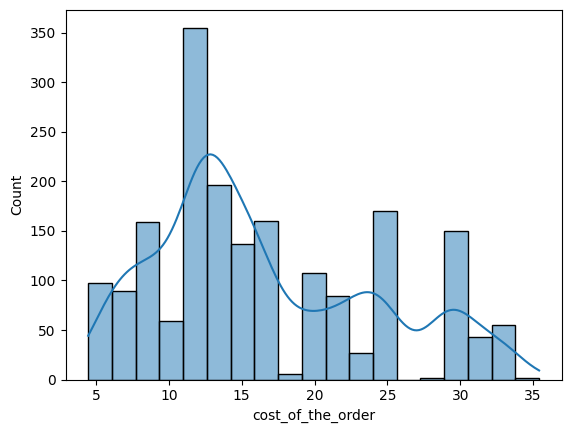

In [11]:
# Write the code here
sns.histplot(data=df,x='cost_of_the_order',kde='true')


<Axes: xlabel='day_of_the_week', ylabel='Count'>

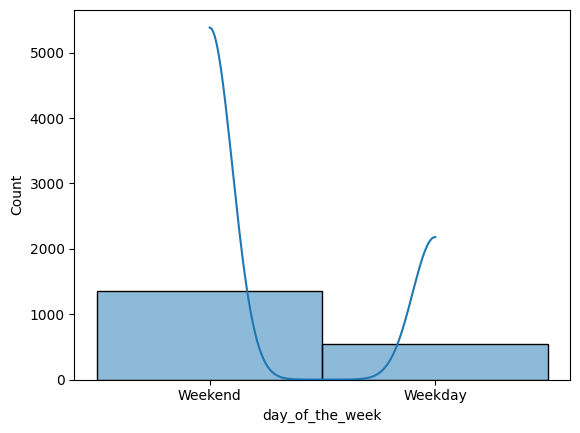

In [ ]:
sns.histplot(data=df,x='day_of_the_week',kde='true')

4.47


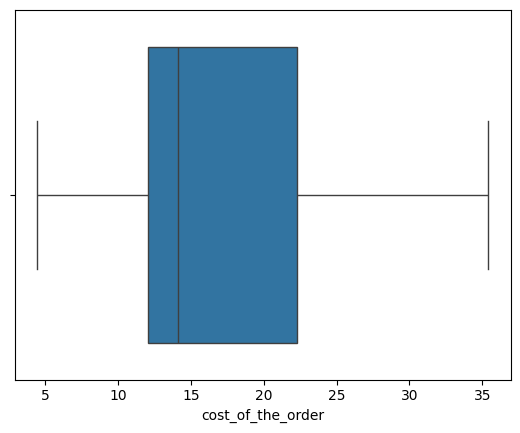

In [ ]:
sns.boxplot(data=df,x='cost_of_the_order')
print(df['cost_of_the_order'].min())

<Axes: xlabel='rating', ylabel='count'>

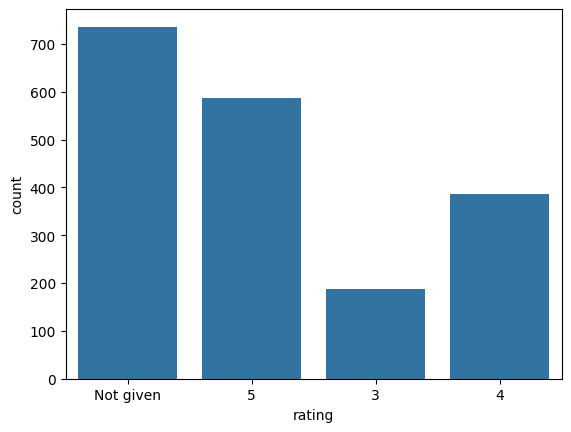

In [ ]:

sns.countplot(data=df,x='rating')

In [12]:
df.groupby(['restaurant_name'])['order_id'].count().sort_values(ascending = False).reset_index().head()


,restaurant_name,order_id
0,Shake Shack,219
1,The Meatball Shop,132
2,Blue Ribbon Sushi,119
3,Blue Ribbon Fried Chicken,96
4,Parm,68


#### Observations: The above output are the top 5 resturants which recived highest number of orders


In [13]:
d_o_w = (df['day_of_the_week']=='Weekend')
df.loc[d_o_w]['cuisine_type'].value_counts().sort_values(ascending=False).reset_index().head(1)



,cuisine_type,count
0,American,415


#### Observations: The most popular cuisine on weekend is American with the count 415


In [14]:
s=df.loc[df['cost_of_the_order']>20,'cost_of_the_order'].count()
l=df['cost_of_the_order'].count()
perc=s/l*100
print(perc)

29.24130663856691


#### Observations: 29.24130663856691 percent of the order costed more than 20$


In [15]:
df['delivery_time'].mean()

24.161749209694417

#### Observations: mean delivery time of order is df['delivery_time'].mean()



In [16]:
df.groupby(df['customer_id'])['order_id'].count().sort_values(ascending=False).reset_index().head()

,customer_id,order_id
0,52832,13
1,47440,10
2,83287,9
3,250494,8
4,65009,7


#### Observations:the above line of code returns the most frequent customers with total number of times they have ordered the food


### Multivariate Analysis

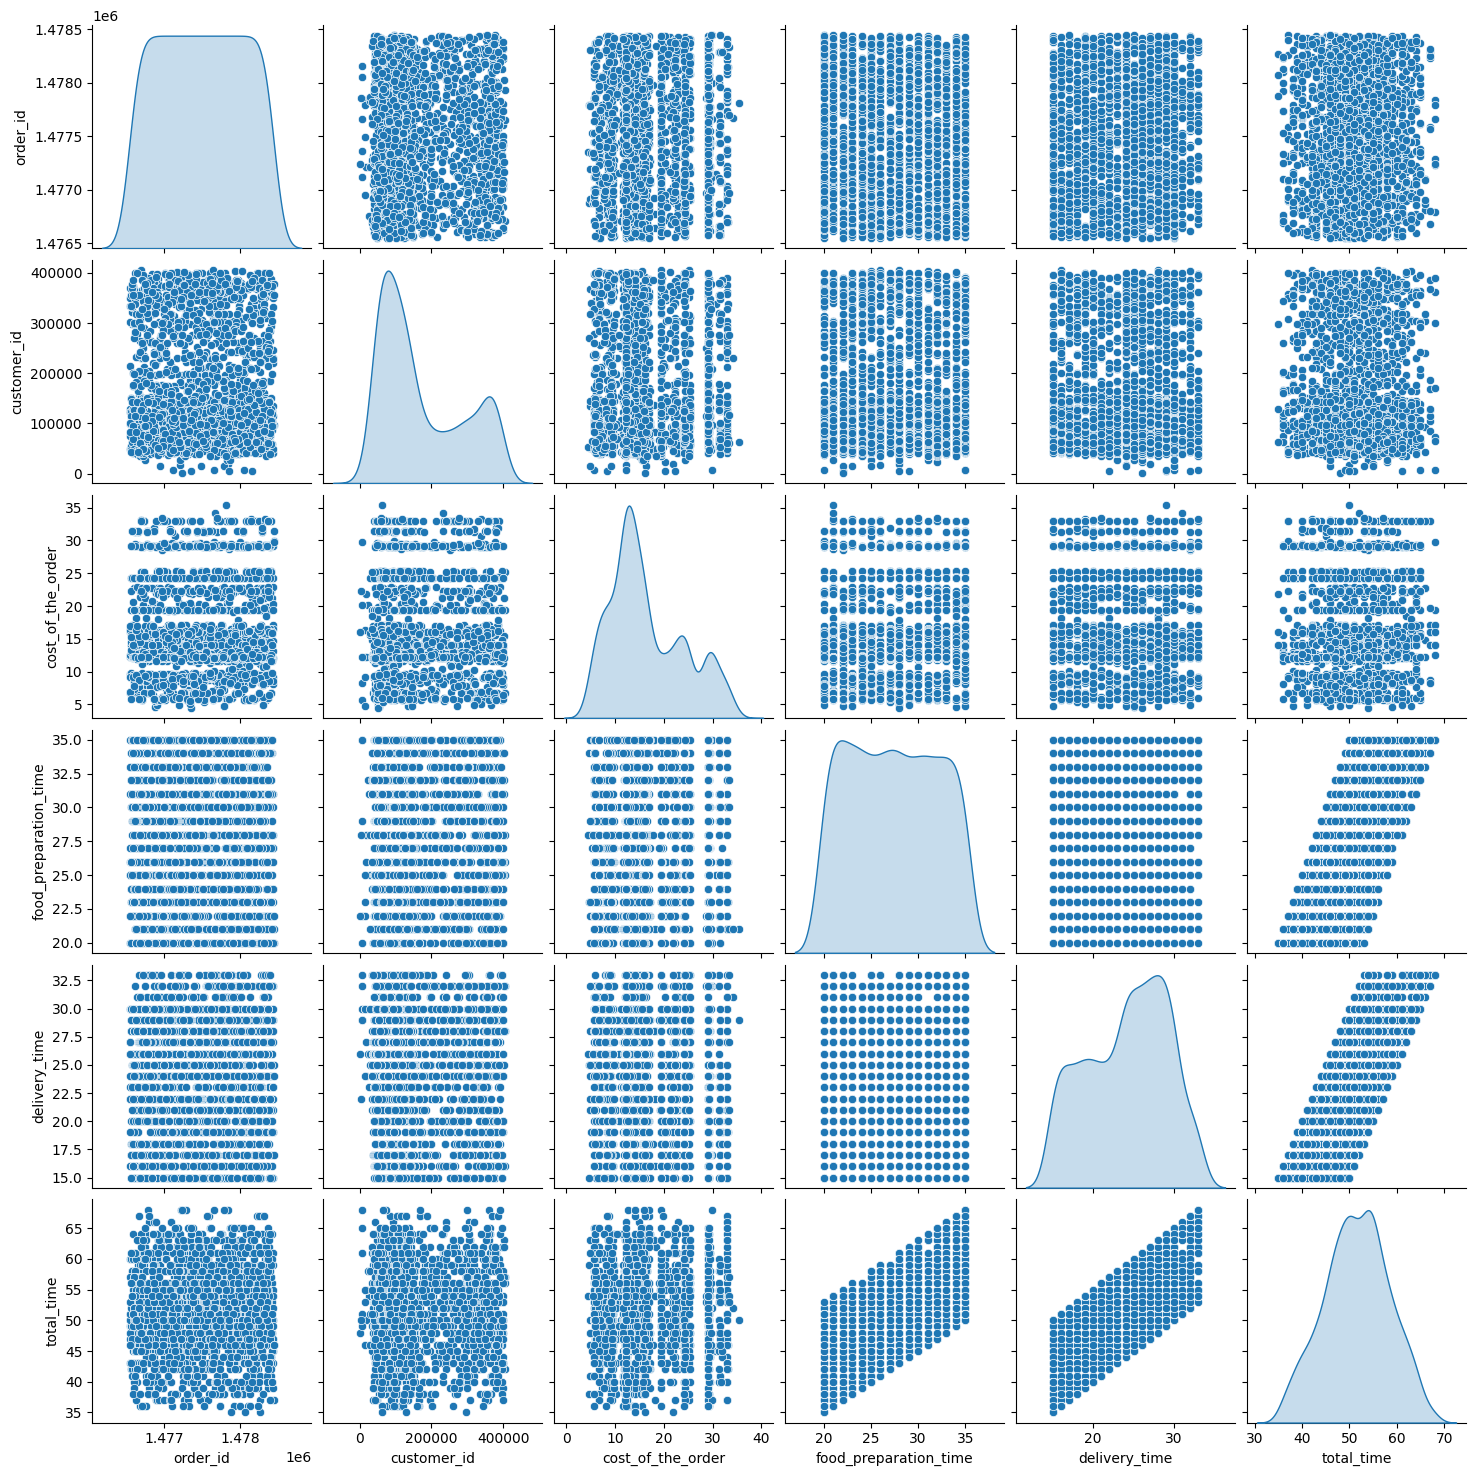

In [24]:
sns.pairplot(df, diag_kind="kde")

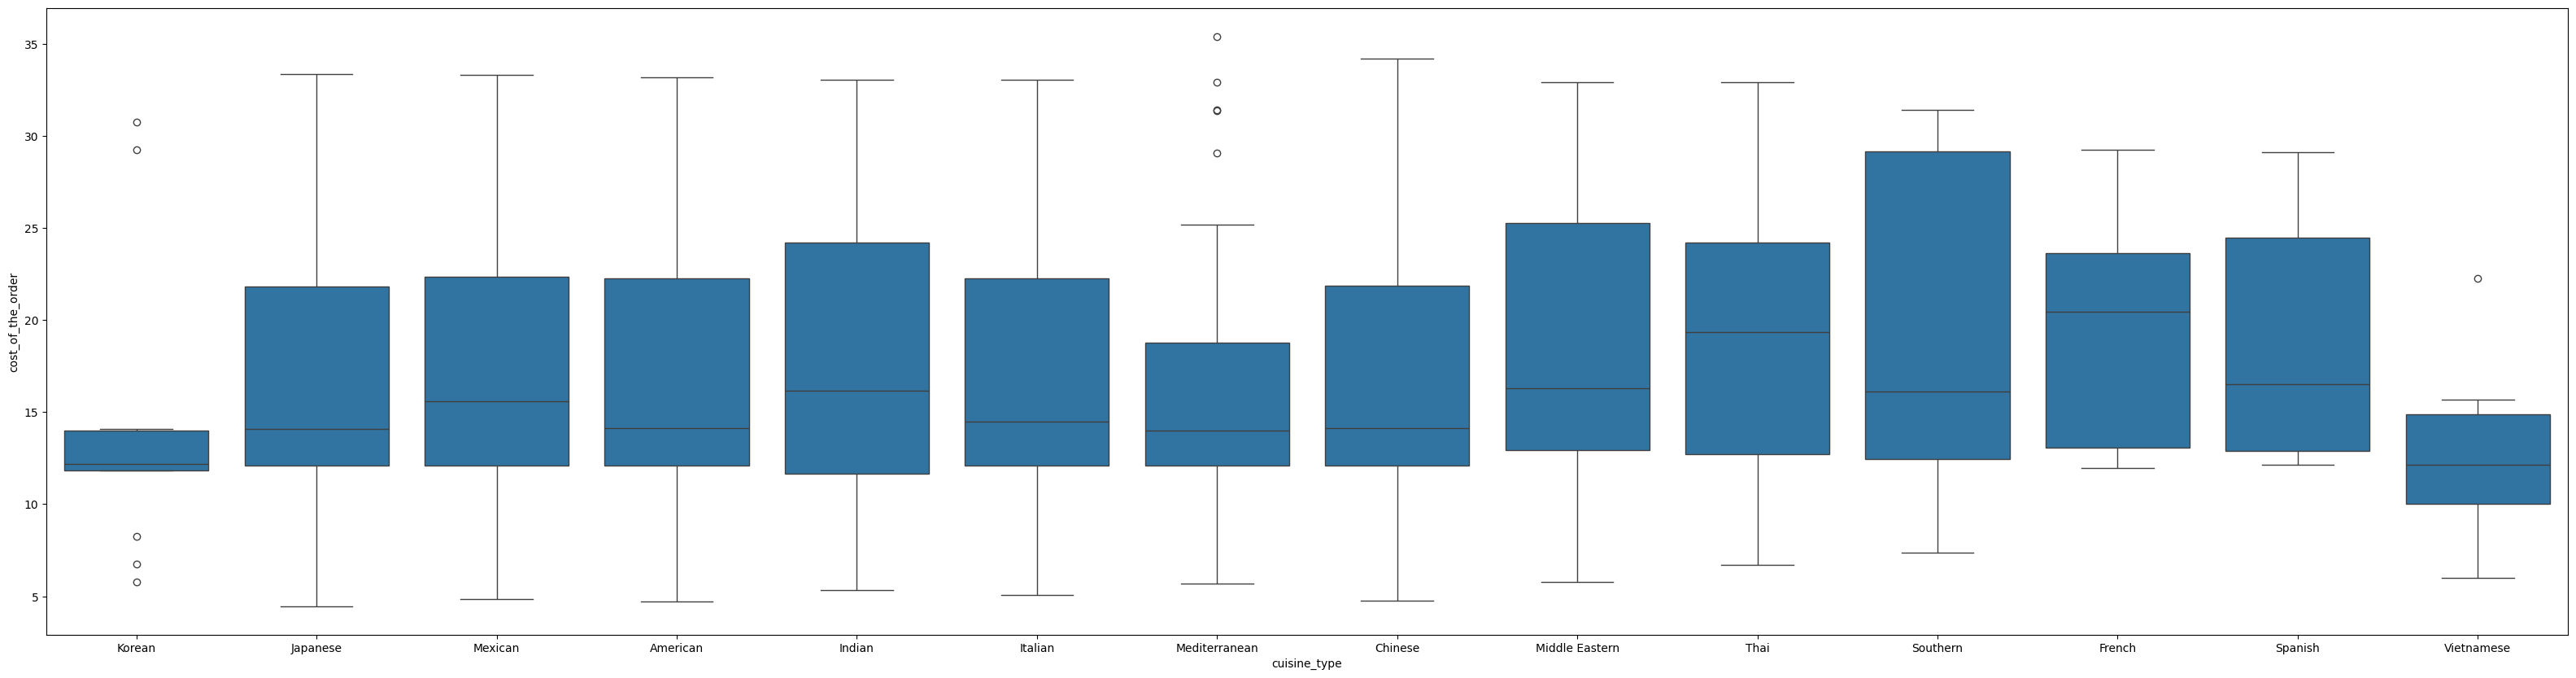

In [31]:
plt.figure(figsize=(40,10))
sns.boxplot(data=df,x='cuisine_type',y='cost_of_the_order');

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 42.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 13.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 68.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 50.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


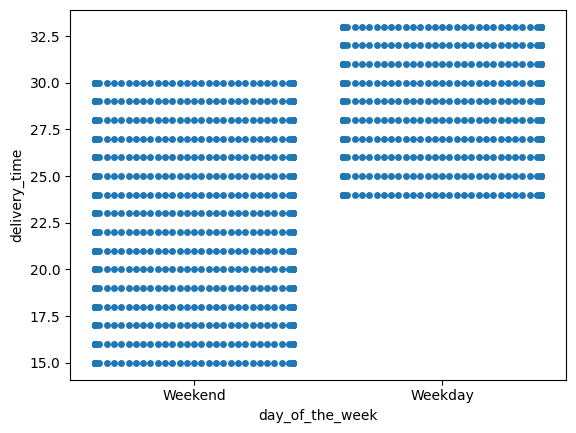

In [25]:
sns.swarmplot(x="day_of_the_week", y="delivery_time", data=df);

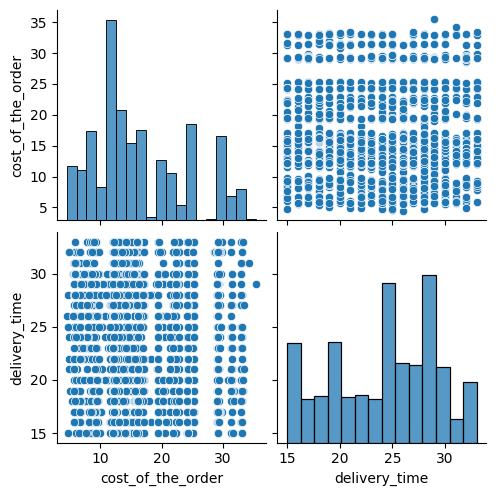

In [32]:
sns.pairplot(df[['cost_of_the_order','rating','delivery_time']]);

In [23]:
tot_count = df.groupby(['restaurant_name'])['rating'].count().reset_index()
tot_count_50 = tot_count[tot_count['rating']>50]['restaurant_name']
average_count = tot_count.groupby(['restaurant_name'])['rating'].mean().reset_index()
average_count_4= average_count[average_count['rating']>4]
average_count_4[average_count_4['restaurant_name'].isin(tot_count_50)].sort_values(by='rating',ascending = False).reset_index()

,index,restaurant_name,rating
0,136,Shake Shack,219.0
1,153,The Meatball Shop,132.0
2,21,Blue Ribbon Sushi,119.0
3,20,Blue Ribbon Fried Chicken,96.0
4,109,Parm,68.0
5,121,RedFarm Broadway,59.0
6,122,RedFarm Hudson,55.0


#### Observations: the above output we can analyse  the restaurants  having a rating count of more than 50 and the average rating is greater than 4


In [17]:
# Write the code here
revenue=0.00
for i in df['cost_of_the_order']:
  if i >20.00:
    revenue = (i*0.25)+revenue
  elif i>5.00:
    revenue = (i*0.15)+revenue
print(revenue)

6166.302999999994


#### Observations:The total revenue generated by the company for the orders above 20 and 5 dollars is 6166.302999999994$


In [19]:
# Write the code here
df['total_time']=df['delivery_time']+df['food_preparation_time']
time60=df.loc[df['total_time']>60]['total_time'].count()
(time60/1898)*100


10.537407797681771

#### Observations:10.54% of the orders take more than 60 minutes to deliver the order.


In [22]:
end = (df.loc[df['day_of_the_week']=='Weekend']['delivery_time']).mean()
day = (df.loc[df['day_of_the_week']=='Weekday']['delivery_time']).mean()
print(end)
print(day)

22.4700222057735
28.340036563071298


#### Observations: the mean delivery time on
 weekdays is 28.340036563071298 % ,
 weekends is 22.4700222057735 %


### Conclusion



*  total of 736 out of 1898 orders were not rated.
*  The most popular cuisine on weekend is American

*  total revenue generated by the company is 6166.30 dollars

*   The mean delivery time of the orders on  weekends is greater than mean delivery time on weedays.
*  more than 10.5% of the order takes more than 60 min to prepare and deliver the food to the customer

*  the customer id 52832 has made order	13 times








---